In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hell-week-mic/sample_submission.csv
/kaggle/input/hell-week-mic/train.csv
/kaggle/input/hell-week-mic/test.csv


Reading train data:

In [3]:
data = pd.read_csv("/kaggle/input/hell-week-mic/train.csv")
print(data.info())
pd.set_option('display.max_columns', None)
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140000 entries, 0 to 139999
Columns: 111 entries, UID to state
dtypes: float64(2), object(109)
memory usage: 118.6+ MB
None


,UID,ph_no,cvv,credit_card_number,job,email,url,country,emoji,name,K3Ll9,19rjS,yeIIP,Bw1V5,5k16L,e2l5S,cg31y,8SVMv,Xsi3p,l8Y6n,vRJwh,CTzXJ,13SMK,WUuos,UyaHP,i6ebQ,ciVeL,fOHiM,1AFO4,b0QUS,vgNLa,EjWMB,Z9KvZ,LsnIb,kMpCl,gomep,1Jfzv,piHSs,SQLeJ,184Wa,HTOAr,gItG5,K7fG4,9rzVt,7Jilh,AOWfH,7hdd4,1QuOM,SQUqt,GZVIZ,TdpFZ,LeWc9,6eCdH,tnrKz,YXZTK,pCgEW,hOqKS,Rc2TO,C3boy,NgYAu,pTU4e,ABLCt,bozM7,Got9C,OyOUV,lcIhR,aDdCa,UZRdX,aWUYS,eX7iy,tDFkL,eWqKh,zPoSs,XIIc6,QyiJU,aUxm5,ToGNB,BYbv6,VWwlJ,gl2KL,eWCdk,qLu1T,cO1Q3,X2hRu,sRaqu,dKQBH,NKspI,Ncx50,QfXOs,Zavi4,HpyWy,op6uG,k9NrC,dTj0P,9IHv6,yiWZJ,JDyPw,3nCgU,Bz7Ov,uN0aA,OaMqz,qhUzJ,FpCOT,zEnW3,ASDn5,vF2is,pZijn,WUc3c,sCIyG,qaERi,state
count,140000,138733,138667.000000,1.387050e+05,138674,138746,138788,138695,138705,138689,138761,138777,138736,138728,138713,138709,138654,138773,138761,138644,138676,138761,138685,138786,138671,138712,138708,138684,138676,138770,138711,138718,138723,138732,138776,138741,138707,138698,138703,138721,138737,138668,138749,138630,138777,138728,138687,138675,138700,138677,138727,138720,138668,138726,138781,138704,138759,138674,138737,138724,138759,138738,138735,138676,138716,138745,138701,138760,138744,138740,138678,138757,138692,138717,138730,138762,138703,138695,138714,138706,138710,138704,138669,138705,138749,138744,138688,138708,138725,138764,138669,138726,138607,138769,138787,138665,138683,138707,138687,138747,138703,138683,138696,138748,138676,138746,138689,138688,138740,138685,140000
unique,139995,138733,NaN,NaN,639,114112,61091,243,3509,91676,138761,138777,138736,138728,138713,138709,138654,138773,138761,138644,138676,138761,138685,138786,138671,138712,138708,138684,138676,138770,138711,138718,138723,138732,138776,138741,138707,138698,138703,138721,138737,138668,138749,138630,138777,138728,138687,138675,138700,138677,138727,138720,138668,138726,138781,138704,138759,138674,138737,138724,138759,138738,138735,138676,138716,138745,138701,138760,138744,138740,138678,138757,138692,138717,138730,138762,138703,138695,138714,138706,138710,138704,138669,138705,138749,138744,138688,138708,138725,138764,138669,138726,138607,138769,138787,138665,138683,138707,138687,138747,138703,138683,138696,138748,138676,138746,138689,138688,138740,138685,10
top,338430309,7059868985,NaN,NaN,Learning disability nurse,lsmith@example.net,https://www.smith.com/,Congo,🧑🏾‍💻,Michael Smith,nwZga^-2.1507574515761925^tw❇CQ,k🍣E‍♀|-47.00024644698884|‍👩h‍J,9Gp🤷🏾%7.191215845738376%lThlH,7🦐🎨w9#12.185065384245283#🤷🏿Fb2,y7xh️|-1.0523684082243272|l5‍St,9👩F👨X%12.327995596025186%P️🍣e👩,❇♀E72|-0.9425430747299177|‍️🎓Es,gH️‍U#-3.8730270802762616#Wn👷🎓🎓,2M🚵u️/0.09537545020492022/ixE🦐🟠,7👩Q❇M%-16.025222568194284%♀yK1♀,E🤷♀QF+-7.3655794366909175+HX‍Dw,️2M️Y?1.0796221036927371?fvkaU,l👷Rjw#0.5765064032235798#🚵🏤G️V,‍Tdl👨-4.070227852017755-7DFNP,E‍U👷6^-7.372061038062977^IukQ1,8LQ‍A|-4.835397738437305|rra🏤0,g️TK👨?8.488299552568225?🏾‍b🍣D,C‍n🏿V|-3.7747765132047197|️Ze♀👩,ev7mf$-31.01137773489955$🏿A👩BY,fg👷ev|0.7615770499184726|jI❤g❇,❇️D🏾d^0.4981824601431571^‍4mOm,Iqs65!-9.472102339882646!M2🏾Af,gmSNf%3.150737773880139%jlcMk,HIVt🏤?-1.5997917530024042?🏿ABlP,‍️‍🏾9-2.942105348232744-v3D👩Z,SI️Xn^18.279100760779606^tQev5,m‍‍‍P?10.750396432924973?6t🏤kS,👨🎨lxg|22.906050928278933|o2p🎨o,🚵L️️Y/-19.039230757295524/🍣I👩f🏿,️‍️🏿️$4.999530776018897$JSKaj,7🤷z❤x/-10.489430302637837/h🏤wQ👩,s🏿ZL‍+1.7950684834794655+PZo👨N,🎨CRXB?0.9810061719796915?Pfq🏾z,U‍1U🤷|-1.3296706042795097|‍J❤hG,W2️🚵R|-2.297502355912423|‍a🏿V1,🏿❇👷♀V$-25.24233877391005$‍🍣t🚵❤,Sj🏾2c|-9.472102339882646|I❇CO3,🏾👩D️r$3.4541239798028096$Y🏾O‍g,Nu👩Gl$-1.370541995204055$OVI🎓Y,2TdMX^-2.075910689894614^E🏿YoG,Md🏾j🍣+-6.657133011213555+🎓u🏾S4,NRH🎨z|-0.39109402891170375|0Y🏿Xn,🤷5🏾‍🏾?-15.012686256116321?JeElJ,Sx🟠v‍!-12.964558734410485!Z3👨️E,d03👩L!-3.642616852200121!Y‍🏾🏿N,mU🏾🤷h#-2.1616012233562616#1Bk👨🎨,aM🏿6m#33.75265359420524#x️ZN🚵,A👩7♀🏿-11.329297848387096-️uLBA,C🟠ZT9@11.359697825875811@FpGjQ,4‍yWp!4.128856738673087!p6Pzt,🏾TG👷J?-1.1193414754493756?r👩MxL,🎓Pb🎓J@0.264361034512788@🟠G❇K1,Xf🏾p🟠$6.997864554075

In [4]:
data.head()

,UID,ph_no,cvv,credit_card_number,job,email,url,country,emoji,name,K3Ll9,19rjS,yeIIP,Bw1V5,5k16L,e2l5S,cg31y,8SVMv,Xsi3p,l8Y6n,vRJwh,CTzXJ,13SMK,WUuos,UyaHP,i6ebQ,ciVeL,fOHiM,1AFO4,b0QUS,vgNLa,EjWMB,Z9KvZ,LsnIb,kMpCl,gomep,1Jfzv,piHSs,SQLeJ,184Wa,HTOAr,gItG5,K7fG4,9rzVt,7Jilh,AOWfH,7hdd4,1QuOM,SQUqt,GZVIZ,TdpFZ,LeWc9,6eCdH,tnrKz,YXZTK,pCgEW,hOqKS,Rc2TO,C3boy,NgYAu,pTU4e,ABLCt,bozM7,Got9C,OyOUV,lcIhR,aDdCa,UZRdX,aWUYS,eX7iy,tDFkL,eWqKh,zPoSs,XIIc6,QyiJU,aUxm5,ToGNB,BYbv6,VWwlJ,gl2KL,eWCdk,qLu1T,cO1Q3,X2hRu,sRaqu,dKQBH,NKspI,Ncx50,QfXOs,Zavi4,HpyWy,op6uG,k9NrC,dTj0P,9IHv6,yiWZJ,JDyPw,3nCgU,Bz7Ov,uN0aA,OaMqz,qhUzJ,FpCOT,zEnW3,ASDn5,vF2is,pZijn,WUc3c,sCIyG,qaERi,state
0,T77962103,7059868985,673.0,2.131868e+14,Copy,guerrerodavid@example.org,http://garcia.org/,Gabon,📑,Cathy Cherry,nwZga^-2.1507574515761925^tw❇CQ,k🍣E‍♀|-47.00024644698884|‍👩h‍J,9Gp🤷🏾%7.191215845738376%lThlH,7🦐🎨w9#12.185065384245283#🤷🏿Fb2,y7xh️|-1.0523684082243272|l5‍St,9👩F👨X%12.327995596025186%P️🍣e👩,❇♀E72|-0.9425430747299177|‍️🎓Es,gH️‍U#-3.8730270802762616#Wn👷🎓🎓,2M🚵u️/0.09537545020492022/ixE🦐🟠,7👩Q❇M%-16.025222568194284%♀yK1♀,E🤷♀QF+-7.3655794366909175+HX‍Dw,️2M️Y?1.0796221036927371?fvkaU,l👷Rjw#0.5765064032235798#🚵🏤G️V,‍Tdl👨-4.070227852017755-7DFNP,E‍U👷6^-7.372061038062977^IukQ1,8LQ‍A|-4.835397738437305|rra🏤0,g️TK👨?8.488299552568225?🏾‍b🍣D,C‍n🏿V|-3.7747765132047197|️Ze♀👩,ev7mf$-31.01137773489955$🏿A👩BY,fg👷ev|0.7615770499184726|jI❤g❇,❇️D🏾d^0.4981824601431571^‍4mOm,Iqs65!-9.472102339882646!M2🏾Af,gmSNf%3.150737773880139%jlcMk,HIVt🏤?-1.5997917530024042?🏿ABlP,‍️‍🏾9-2.942105348232744-v3D👩Z,SI️Xn^18.279100760779606^tQev5,m‍‍‍P?10.750396432924973?6t🏤kS,👨🎨lxg|22.906050928278933|o2p🎨o,🚵L️️Y/-19.039230757295524/🍣I👩f🏿,️‍️🏿️$4.999530776018897$JSKaj,7🤷z❤x/-10.489430302637837/h🏤wQ👩,s🏿ZL‍+1.7950684834794655+PZo👨N,🎨CRXB?0.9810061719796915?Pfq🏾z,U‍1U🤷|-1.3296706042795097|‍J❤hG,W2️🚵R|-2.297502355912423|‍a🏿V1,🏿❇👷♀V$-25.24233877391005$‍🍣t🚵❤,Sj🏾2c|-9.472102339882646|I❇CO3,🏾👩D️r$3.4541239798028096$Y🏾O‍g,Nu👩Gl$-1.370541995204055$OVI🎓Y,2TdMX^-2.075910689894614^E🏿YoG,Md🏾j🍣+-6.657133011213555+🎓u🏾S4,NRH🎨z|-0.39109402891170375|0Y🏿Xn,🤷5🏾‍🏾?-15.012686256116321?JeElJ,Sx🟠v‍!-12.964558734410485!Z3👨️E,d03👩L!-3.642616852200121!Y‍🏾🏿N,mU🏾🤷h#-2.1616012233562616#1Bk👨🎨,aM🏿6m#33.75265359420524#x️ZN🚵,A👩7♀🏿-11.329297848387096-️uLBA,C🟠ZT9@11.359697825875811@FpGjQ,4‍yWp!4.128856738673087!p6Pzt,🏾TG👷J?-1.1193414754493756?r👩MxL,🎓Pb🎓J@0.264361034512788@🟠G❇K1,Xf🏾p🟠$6.997864554075737$🦐🏾l👩🏾,tM️‍A|-3.8275179558924|dC👨🏾️,ey🏿️p+-6.43094743208572+tyB🍣🏿,tsj🏿2+0.6905445641778746+0uJW👩,80hAx!9.89998051204586!2N3HD,d🤷bp1-4.999530776018897-🏤4️O️,🏿ESSX$9.080692749690394$g‍hNs,👩🏿🚵Gy!-3.1965923791634085!zN‍️H,🍣a🏾84+8.617565517533132+❇🏿d🍣‍,V🦐🏾Jm/0.09159068316863705/x♀iaG,P🏾ZHv^8.456291979329066^2ofZG,Zb🏾9🎓^-2.9260366616766564^ifk‍z,️❇🏾‍k|1.0481373141829922|9🏾tnl,❇️rtF/-10.489430302637837/👷♀❤y👷,T🦐Zb❇|17.75934497798938|Ce🏤👩‍,sIESb^-1.5869771493078786^7Tpq‍,H0OWB/1.4443191482393745/l03‍0,Tgb3‍|-7.880761943058992|❤🦐3ht,‍6Kw️+-6.657133011213555+‍YWvW,🤷IkG4^0.6749531615158386^‍9z09,NaN,k🏿nK👷|15.151693750886883|🍣️❤u❤,y4s61!-15.012686256116321!tt2lb,2👩ybL?17.264626479667402?‍OVGg,ig8‍m@2.138838774194136@1yMP👨,K♀🍣🍣❤|-5.859716505479815|NM🤷♀V,♀F👷🍣j|45.62549033068572|c5👷👩g,️v️8👷?-10.293232964383538?Ptda‍,👷9H9B-3.130505419064308-ltjf4,🏾‍XtO#-47.00024644698884#j‍niz,🚵🍣aFq$0.6103687840506078$pub🏤r,‍2QW2|8.456291979329066|KE6‍👷,♀o️r🏾-11.880581809175762-oh👩w6,iL🦐4p!29.24245894909522!NHTQT,H‍🏾👨I--2.2652358523732516-️V9hd,a👩🏾👷🍣^-30.43579484902386^F👨eZK,w👨9Dl-4.128856738673087-🏿AGZL,bIJne$-6.4652596087816665$gX️r️,Iwp🏤5!-44.21110014844807!G🚵O‍🏿,🍣🏿🟠U👨@9.028568970658524@️bY‍t,N6♀rs%-0.17374199145886737%g2Fu7,dwLNC+-16.438253859793118+D🟠Mj👩,♀Y‍tt^-5.683708646092431^7b🎓🍣T,Q👩👨H🏾?4.495020766798911?p🎨dBV,JC🍣8Q!1.3976340938324077!Wo‍6t,QtgcM|-2.1616012233562616|srwW❇,♀👩🦐pq%7.619063527183258%👨Oet♀,‍🏿🟠👩X+-7.00274740118153+‍b🎨VK,Despair
1,O92591533,+1-288-810-2425x013,983.0,4.820055e+15,Interior and spatial designer,michaela47@example.org,http://ortiz.com/,Bermuda,🥷🏿

In [5]:
data.sample(20)

,UID,ph_no,cvv,credit_card_number,job,email,url,country,emoji,name,K3Ll9,19rjS,yeIIP,Bw1V5,5k16L,e2l5S,cg31y,8SVMv,Xsi3p,l8Y6n,vRJwh,CTzXJ,13SMK,WUuos,UyaHP,i6ebQ,ciVeL,fOHiM,1AFO4,b0QUS,vgNLa,EjWMB,Z9KvZ,LsnIb,kMpCl,gomep,1Jfzv,piHSs,SQLeJ,184Wa,HTOAr,gItG5,K7fG4,9rzVt,7Jilh,AOWfH,7hdd4,1QuOM,SQUqt,GZVIZ,TdpFZ,LeWc9,6eCdH,tnrKz,YXZTK,pCgEW,hOqKS,Rc2TO,C3boy,NgYAu,pTU4e,ABLCt,bozM7,Got9C,OyOUV,lcIhR,aDdCa,UZRdX,aWUYS,eX7iy,tDFkL,eWqKh,zPoSs,XIIc6,QyiJU,aUxm5,ToGNB,BYbv6,VWwlJ,gl2KL,eWCdk,qLu1T,cO1Q3,X2hRu,sRaqu,dKQBH,NKspI,Ncx50,QfXOs,Zavi4,HpyWy,op6uG,k9NrC,dTj0P,9IHv6,yiWZJ,JDyPw,3nCgU,Bz7Ov,uN0aA,OaMqz,qhUzJ,FpCOT,zEnW3,ASDn5,vF2is,pZijn,WUc3c,sCIyG,qaERi,state
55092,011072715,760-780-3295,41.0,5.038059e+11,Clinical psychologist,daniel81@example.org,http://www.fischer.biz/,South Africa,🧚🏾‍♂️,John Brown,nwZga^-9.516632940689547^tw❇CQ,k🍣E‍♀|17.064465760694713|‍👩h‍J,9Gp🤷🏾%-16.19521279367187%lThlH,7🦐🎨w9#-10.54956742861649#🤷🏿Fb2,y7xh️|3.1907346040580045|l5‍St,9👩F👨X%7.20231604614442%P️🍣e👩,❇♀E72|3.840503071090594|‍️🎓Es,gH️‍U#-6.036182655251983#Wn👷🎓🎓,2M🚵u️/-6.538348942368217/ixE🦐🟠,7👩Q❇M%7.117235402309806%♀yK1♀,E🤷♀QF+5.73830626976666+HX‍Dw,️2M️Y?2.697728513406383?fvkaU,l👷Rjw#6.073926042024096#🚵🏤G️V,‍Tdl👨--0.8289630673204573-7DFNP,E‍U👷6^8.983821199878786^IukQ1,8LQ‍A|6.506538605411169|rra🏤0,g️TK👨?-1.5652341352141121?🏾‍b🍣D,C‍n🏿V|5.093780104988855|️Ze♀👩,ev7mf$8.652169574466871$🏿A👩BY,fg👷ev|-3.973817835198751|jI❤g❇,❇️D🏾d^8.693623265871988^‍4mOm,Iqs65!9.081627459000279!M2🏾Af,gmSNf%-7.910627739081857%jlcMk,HIVt🏤?8.598885537403122?🏿ABlP,‍️‍🏾9--0.8552209061432599-v3D👩Z,SI️Xn^19.744421316461196^tQev5,m‍‍‍P?-8.01594486572633?6t🏤kS,👨🎨lxg|-11.940539972983448|o2p🎨o,🚵L️️Y/34.40232671956056/🍣I👩f🏿,️‍️🏿️$-3.980129452544522$JSKaj,7🤷z❤x/-11.319649507228156/h🏤wQ👩,s🏿ZL‍+15.812403145914235+PZo👨N,🎨CRXB?5.037302818178123?Pfq🏾z,U‍1U🤷|3.4115577267270747|‍J❤hG,W2️🚵R|6.245099750393791|‍a🏿V1,🏿❇👷♀V$24.014845320827114$‍🍣t🚵❤,Sj🏾2c|9.081627459000279|I❇CO3,🏾👩D️r$15.362584931392702$Y🏾O‍g,Nu👩Gl$-2.44977664443456$OVI🎓Y,2TdMX^5.305541898706709^E🏿YoG,Md🏾j🍣+0.47622283590474024+🎓u🏾S4,NRH🎨z|-1.1681742184098516|0Y🏿Xn,🤷5🏾‍🏾?9.991062765802392?JeElJ,Sx🟠v‍!-39.01062774935976!Z3👨️E,d03👩L!-1.6271618347277386!Y‍🏾🏿N,mU🏾🤷h#-0.6053267250094667#1Bk👨🎨,aM🏿6m#-5.445593752777346#x️ZN🚵,A👩7♀🏿--4.072656911106375-️uLBA,C🟠ZT9@29.1014401876256@FpGjQ,4‍yWp!-3.6333840778376265!p6Pzt,🏾TG👷J?-7.04971795923588?r👩MxL,🎓Pb🎓J@-17.398359011925002@🟠G❇K1,Xf🏾p🟠$-2.237114353887386$🦐🏾l👩🏾,tM️‍A|-21.515143354977056|dC👨🏾️,ey🏿️p+3.879117533197257+tyB🍣🏿,tsj🏿2+0.82801298294922+0uJW👩,80hAx!5.005340836210546!2N3HD,d🤷bp1--3.980129452544522-🏤4️O️,🏿ESSX$14.452371626099715$g‍hNs,👩🏿🚵Gy!4.007380763089581!zN‍️H,🍣a🏾84+1.4267506236546752+❇🏿d🍣‍,V🦐🏾Jm/-0.010862999581516375/x♀iaG,P🏾ZHv^2.9470029374352174^2ofZG,Zb🏾9🎓^-3.6615312426171833^ifk‍z,️❇🏾‍k|-1.0011887219933588|9🏾tnl,❇️rtF/-11.319649507228156/👷♀❤y👷,T🦐Zb❇|-30.95559457597169|Ce🏤👩‍,sIESb^7.785106894078192^7Tpq‍,H0OWB/-3.5611914947518994/l03‍0,Tgb3‍|-8.243196267756124|❤🦐3ht,‍6Kw️+0.47622283590474024+‍YWvW,🤷IkG4^-1.3225000116221959^‍9z09,E👷6🍣D/7.375671907308601/LIr👩👩,k🏿nK👷|2.2136163358526724|🍣️❤u❤,y4s61!9.991062765802392!tt2lb,2👩ybL?-21.644342971129586?‍OVGg,ig8‍m@-3.184307187148843@1yMP👨,K♀🍣🍣❤|-1.3344009844858036|NM🤷♀V,♀F👷🍣j|2.7692903193557|c5👷👩g,️v️8👷?-0.47311904910751035?Ptda‍,👷9H9B-4.077001292654179-ltjf4,🏾‍XtO#17.064465760694713#j‍niz,🚵🍣aFq$2.4906217381634206$pub🏤r,‍2QW2|2.9470029374352174|KE6‍👷,♀o️r🏾--30.01369194647637-oh👩w6,iL🦐4p!-22.46267144403052!NHTQT,NaN,a👩🏾👷🍣^34.66057271120221^F👨eZK,w👨9Dl--3.6333840778376265-🏿AGZL,bIJne$-22.136825387355646$gX️r️,Iwp🏤5!9.73908274583484!G🚵O‍🏿,🍣🏿🟠U👨@8.167790580963867@️bY‍t,N6♀rs%3.957644214736329%g2Fu7,dwLNC+16.690642869619452+D🟠Mj👩,♀Y‍tt^-1.4395132898344294^7b🎓🍣T,Q👩👨H🏾?2.3839809278328956?p🎨dBV,JC🍣8Q!7.375671907308601!Wo‍6t,QtgcM|-0.6053267250094667|srwW❇,♀👩🦐pq%-8.64236778354099%👨Oet♀,‍🏿🟠👩X+2.468340840479699+‍b🎨VK,Stress
26401,G22275105,965.406.0854x77869,97.0,6.390163e+11,Publishing rights manager,cindy29@example.net,http://www.fisher-bal

From the above its obvious columns ph_no to name are all not important for making predictions and so they can be dropped. 

Lets experiment with only rows that have all columns, for final model this is too much data loss to be acceptable but trying stuff on this shortened dataset should make eda easier.

In [7]:
data1 = data.drop(['UID','ph_no', 'cvv','credit_card_number','job','email','url','country','emoji','name'],axis = 1).dropna()
data1.describe()

,K3Ll9,19rjS,yeIIP,Bw1V5,5k16L,e2l5S,cg31y,8SVMv,Xsi3p,l8Y6n,vRJwh,CTzXJ,13SMK,WUuos,UyaHP,i6ebQ,ciVeL,fOHiM,1AFO4,b0QUS,vgNLa,EjWMB,Z9KvZ,LsnIb,kMpCl,gomep,1Jfzv,piHSs,SQLeJ,184Wa,HTOAr,gItG5,K7fG4,9rzVt,7Jilh,AOWfH,7hdd4,1QuOM,SQUqt,GZVIZ,TdpFZ,LeWc9,6eCdH,tnrKz,YXZTK,pCgEW,hOqKS,Rc2TO,C3boy,NgYAu,pTU4e,ABLCt,bozM7,Got9C,OyOUV,lcIhR,aDdCa,UZRdX,aWUYS,eX7iy,tDFkL,eWqKh,zPoSs,XIIc6,QyiJU,aUxm5,ToGNB,BYbv6,VWwlJ,gl2KL,eWCdk,qLu1T,cO1Q3,X2hRu,sRaqu,dKQBH,NKspI,Ncx50,QfXOs,Zavi4,HpyWy,op6uG,k9NrC,dTj0P,9IHv6,yiWZJ,JDyPw,3nCgU,Bz7Ov,uN0aA,OaMqz,qhUzJ,FpCOT,zEnW3,ASDn5,vF2is,pZijn,WUc3c,sCIyG,qaERi,state
count,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598
unique,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,11598,10
top,nwZga^-6.065571148914812^tw❇CQ,k🍣E‍♀|10.830220772220958|‍👩h‍J,9Gp🤷🏾%-22.02861579392728%lThlH,7🦐🎨w9#37.89363888258886#🤷🏿Fb2,y7xh️|6.572903790362596|l5‍St,9👩F👨X%-15.721931276128396%P️🍣e👩,❇♀E72|0.9371947335141102|‍️🎓Es,gH️‍U#12.122229919714853#Wn👷🎓🎓,2M🚵u️/-3.470688470116544/ixE🦐🟠,7👩Q❇M%-30.678335983854264%♀yK1♀,E🤷♀QF+-1.6513312604615922+HX‍Dw,️2M️Y?-3.039994455566799?fvkaU,l👷Rjw#4.33828898810246#🚵🏤G️V,‍Tdl👨--0.09474417236669896-7DFNP,E‍U👷6^-11.61671859180575^IukQ1,8LQ‍A|-0.4073279150159692|rra🏤0,g️TK👨?-5.050738095370881?🏾‍b🍣D,C‍n🏿V|-0.9828894135011621|️Ze♀👩,ev7mf$13.57584041494622$🏿A👩BY,fg👷ev|-3.73275102920425|jI❤g❇,❇️D🏾d^17.58308052944353^‍4mOm,Iqs65!-5.23519797576777!M2🏾Af,gmSNf%0.7107359336115653%jlcMk,HIVt🏤?-1.0473506657503584?🏿ABlP,‍️‍🏾9--9.937204753272749-v3D👩Z,SI️Xn^13.435274695397343^tQev5,m‍‍‍P?12.708943024787299?6t🏤kS,👨🎨lxg|12.215897924937284|o2p🎨o,🚵L️️Y/-21.31367471293949/🍣I👩f🏿,️‍️🏿️$0.03710255209245461$JSKaj,7🤷z❤x/8.006292094251759/h🏤wQ👩,s🏿ZL‍+2.0860692205620013+PZo👨N,🎨CRXB?24.6690642831204?Pfq🏾z,U‍1U🤷|-13.996228231337541|‍J❤hG,W2️🚵R|2.6337294645068337|‍a🏿V1,🏿❇👷♀V$-17.442648940518502$‍🍣t🚵❤,Sj🏾2c|-5.23519797576777|I❇CO3,🏾👩D️r$21.71490614485565$Y🏾O‍g,Nu👩Gl$0.7942617393707379$OVI🎓Y,2TdMX^-1.2575955172522466^E🏿YoG,Md🏾j🍣+-0.8370707520366812+🎓u🏾S4,NRH🎨z|-0.18758450548940764|0Y🏿Xn,🤷5🏾‍🏾?14.879689690573324?JeElJ,Sx🟠v‍!5.840124136924336!Z3👨️E,d03👩L!-7.3393212578905604!Y‍🏾🏿N,mU🏾🤷h#-5.42787813792933#1Bk👨🎨,aM🏿6m#-16.649451334228456#x️ZN🚵,A👩7♀🏿--23.928049884669033-️uLBA,C🟠ZT9@21.04077438655848@FpGjQ,4‍yWp!3.555450624476036!p6Pzt,🏾TG👷J?1.322261542453062?r👩MxL,🎓Pb🎓J@23.55375555752981@🟠G❇K1,Xf🏾p🟠$-2.0270676850408265$🦐🏾l👩🏾,tM️‍A|0.4332541556995549|dC👨🏾️,ey🏿️p+-0.04120166783204715+tyB🍣🏿,tsj🏿2+-1.4380104357745211+0uJW👩,80hAx!6.844504685914332!2N3HD,d🤷bp1-0.03710255209245461-🏤4️O️,🏿ESSX$17.352463736530954$g‍hNs,👩🏿🚵Gy!1.0566888252602458!zN‍️H,🍣a🏾84+-9.690035433423862+❇🏿d🍣‍,V🦐🏾Jm/5.594401079281955/x♀iaG,P🏾ZHv^-3.8960820498055426^2ofZG,Zb🏾9🎓^-3.83204232233529^ifk‍z,️❇🏾‍k|-7.008765606586557|9🏾tnl,❇️rtF/8.006292094251759/👷♀❤y👷,T🦐Zb❇|22.446248064099706|Ce🏤👩‍,sIESb^1.683257224849514^7Tpq‍,H0OWB/0.36213759588080197/l03‍0,Tgb3‍|1.4030109366782164|❤🦐

All columns have a float value with some characters on either side if they are not null. This can be cleaned by using regex to only get the float values 

In [8]:
import re
def extract_float(text):
    float_pattern = r'[-+]?\d+\.\d+'
    floats = re.findall(float_pattern, text)
    if floats:
        return float(floats[0])
    else:
        return None
data2 = data1.drop('state', axis = 1)

In [9]:
data1.head()

,K3Ll9,19rjS,yeIIP,Bw1V5,5k16L,e2l5S,cg31y,8SVMv,Xsi3p,l8Y6n,vRJwh,CTzXJ,13SMK,WUuos,UyaHP,i6ebQ,ciVeL,fOHiM,1AFO4,b0QUS,vgNLa,EjWMB,Z9KvZ,LsnIb,kMpCl,gomep,1Jfzv,piHSs,SQLeJ,184Wa,HTOAr,gItG5,K7fG4,9rzVt,7Jilh,AOWfH,7hdd4,1QuOM,SQUqt,GZVIZ,TdpFZ,LeWc9,6eCdH,tnrKz,YXZTK,pCgEW,hOqKS,Rc2TO,C3boy,NgYAu,pTU4e,ABLCt,bozM7,Got9C,OyOUV,lcIhR,aDdCa,UZRdX,aWUYS,eX7iy,tDFkL,eWqKh,zPoSs,XIIc6,QyiJU,aUxm5,ToGNB,BYbv6,VWwlJ,gl2KL,eWCdk,qLu1T,cO1Q3,X2hRu,sRaqu,dKQBH,NKspI,Ncx50,QfXOs,Zavi4,HpyWy,op6uG,k9NrC,dTj0P,9IHv6,yiWZJ,JDyPw,3nCgU,Bz7Ov,uN0aA,OaMqz,qhUzJ,FpCOT,zEnW3,ASDn5,vF2is,pZijn,WUc3c,sCIyG,qaERi,state
3,nwZga^-6.065571148914812^tw❇CQ,k🍣E‍♀|10.830220772220958|‍👩h‍J,9Gp🤷🏾%-22.02861579392728%lThlH,7🦐🎨w9#37.89363888258886#🤷🏿Fb2,y7xh️|6.572903790362596|l5‍St,9👩F👨X%-15.721931276128396%P️🍣e👩,❇♀E72|0.9371947335141102|‍️🎓Es,gH️‍U#12.122229919714853#Wn👷🎓🎓,2M🚵u️/-3.470688470116544/ixE🦐🟠,7👩Q❇M%-30.678335983854264%♀yK1♀,E🤷♀QF+-1.6513312604615922+HX‍Dw,️2M️Y?-3.039994455566799?fvkaU,l👷Rjw#4.33828898810246#🚵🏤G️V,‍Tdl👨--0.09474417236669896-7DFNP,E‍U👷6^-11.61671859180575^IukQ1,8LQ‍A|-0.4073279150159692|rra🏤0,g️TK👨?-5.050738095370881?🏾‍b🍣D,C‍n🏿V|-0.9828894135011621|️Ze♀👩,ev7mf$13.57584041494622$🏿A👩BY,fg👷ev|-3.73275102920425|jI❤g❇,❇️D🏾d^17.58308052944353^‍4mOm,Iqs65!-5.23519797576777!M2🏾Af,gmSNf%0.7107359336115653%jlcMk,HIVt🏤?-1.0473506657503584?🏿ABlP,‍️‍🏾9--9.937204753272749-v3D👩Z,SI️Xn^13.435274695397343^tQev5,m‍‍‍P?12.708943024787299?6t🏤kS,👨🎨lxg|12.215897924937284|o2p🎨o,🚵L️️Y/-21.31367471293949/🍣I👩f🏿,️‍️🏿️$0.03710255209245461$JSKaj,7🤷z❤x/8.006292094251759/h🏤wQ👩,s🏿ZL‍+2.0860692205620013+PZo👨N,🎨CRXB?24.6690642831204?Pfq🏾z,U‍1U🤷|-13.996228231337541|‍J❤hG,W2️🚵R|2.6337294645068337|‍a🏿V1,🏿❇👷♀V$-17.442648940518502$‍🍣t🚵❤,Sj🏾2c|-5.23519797576777|I❇CO3,🏾👩D️r$21.71490614485565$Y🏾O‍g,Nu👩Gl$0.7942617393707379$OVI🎓Y,2TdMX^-1.2575955172522466^E🏿YoG,Md🏾j🍣+-0.8370707520366812+🎓u🏾S4,NRH🎨z|-0.18758450548940764|0Y🏿Xn,🤷5🏾‍🏾?14.879689690573324?JeElJ,Sx🟠v‍!5.840124136924336!Z3👨️E,d03👩L!-7.3393212578905604!Y‍🏾🏿N,mU🏾🤷h#-5.42787813792933#1Bk👨🎨,aM🏿6m#-16.649451334228456#x️ZN🚵,A👩7♀🏿--23.928049884669033-️uLBA,C🟠ZT9@21.04077438655848@FpGjQ,4‍yWp!3.555450624476036!p6Pzt,🏾TG👷J?1.322261542453062?r👩MxL,🎓Pb🎓J@23.55375555752981@🟠G❇K1,Xf🏾p🟠$-2.0270676850408265$🦐🏾l👩🏾,tM️‍A|0.4332541556995549|dC👨🏾️,ey🏿️p+-0.04120166783204715+tyB🍣🏿,tsj🏿2+-1.4380104357745211+0uJW👩,80hAx!6.844504685914332!2N3HD,d🤷bp1-0.03710255209245461-🏤4️O️,🏿ESSX$17.352463736530954$g‍hNs,👩🏿🚵Gy!1.0566888252602458!zN‍️H,🍣a🏾84+-9.690035433423862+❇🏿d🍣‍,V🦐🏾Jm/5.594401079281955/x♀iaG,P🏾ZHv^-3.8960820498055426^2ofZG,Zb🏾9🎓^-3.83204232233529^ifk‍z,️❇🏾‍k|-7.008765606586557|9🏾tnl,❇️rtF/8.006292094251759/👷♀❤y👷,T🦐Zb❇|22.446248064099706|Ce🏤👩‍,sIESb^1.683257224849514^7Tpq‍,H0OWB/0.36213759588080197/l03‍0,Tgb3‍|1.4030109366782164|❤🦐3ht,‍6Kw️+-0.8370707520366812+‍YWvW,🤷IkG4^2.4462644741409822^‍9z09,E👷6🍣D/-0.2388097363537749/LIr👩👩,k🏿nK👷|-2.4772622463856266|🍣️❤u❤,y4s61!14.879689690573324!tt2lb,2👩ybL?6.572823353297918?‍OVGg,ig8‍m@-3.371280183864558@1yMP👨,K♀🍣🍣❤|2.4645482136772485|NM🤷♀V,♀F👷🍣j|-6.408821375119723|c5👷👩g,️v️8👷?28.851869998879195?Ptda‍,👷9H9B--3.9809546740409134-ltjf4,🏾‍XtO#10.830220772220958#j‍niz,🚵🍣aFq$2.6530662177943154$pub🏤r,‍2QW2|-3.8960820498055426|KE6‍👷,♀o️r🏾-3.8302597936118943-oh👩w6,iL🦐4p!-9.254687070354269!NHTQT,H‍🏾👨I-9.525386255565389-️V9hd,a👩🏾👷🍣^-26.889694396423767^F👨eZK,w👨9Dl-3.555450624476036-🏿AGZL,bIJne$19.21205350112901$gX️r️,Iwp🏤5!-10.487963976504213!G🚵O‍🏿,🍣🏿🟠U👨@-11.829454766573882@️bY‍t,N6♀rs%-10.87012476653127%g2Fu7,dwLNC+26.131133464440587+D🟠Mj👩,♀Y‍tt^2.1159115210320385^7b🎓🍣T,Q👩👨H🏾?7.373067390546165?p🎨dBV,JC🍣8Q!-0.2388097363537749!Wo‍6t,QtgcM|-5.42787813792933|srwW❇,♀👩🦐pq%24.501780969213996%👨Oet♀,‍🏿🟠👩X+-0.8456272162320895+‍b🎨VK,Fatigue
31,nwZga^-5.75182337931242^tw❇CQ,k🍣E‍♀|-40.72222057468113|‍👩h‍J,9Gp🤷🏾%-12.88255651089649%lThlH,7🦐🎨w9#35.50580287547781#🤷🏿Fb2,y7xh️|-1.9672173708299208|l5‍St,9👩F👨X%-28.1196959657097%P️🍣e👩,❇♀E72|-0.15619066238138168|‍️🎓Es,gH️‍U#20.5405853213297#Wn👷🎓🎓,2M🚵u️/3.3385256317347816/ixE🦐

Applying our function to clean the data

In [10]:
for i in data2.columns:
    data2[i] = data2[i].map(extract_float)

In [11]:
data2.describe()

,K3Ll9,19rjS,yeIIP,Bw1V5,5k16L,e2l5S,cg31y,8SVMv,Xsi3p,l8Y6n,vRJwh,CTzXJ,13SMK,WUuos,UyaHP,i6ebQ,ciVeL,fOHiM,1AFO4,b0QUS,vgNLa,EjWMB,Z9KvZ,LsnIb,kMpCl,gomep,1Jfzv,piHSs,SQLeJ,184Wa,HTOAr,gItG5,K7fG4,9rzVt,7Jilh,AOWfH,7hdd4,1QuOM,SQUqt,GZVIZ,TdpFZ,LeWc9,6eCdH,tnrKz,YXZTK,pCgEW,hOqKS,Rc2TO,C3boy,NgYAu,pTU4e,ABLCt,bozM7,Got9C,OyOUV,lcIhR,aDdCa,UZRdX,aWUYS,eX7iy,tDFkL,eWqKh,zPoSs,XIIc6,QyiJU,aUxm5,ToGNB,BYbv6,VWwlJ,gl2KL,eWCdk,qLu1T,cO1Q3,X2hRu,sRaqu,dKQBH,NKspI,Ncx50,QfXOs,Zavi4,HpyWy,op6uG,k9NrC,dTj0P,9IHv6,yiWZJ,JDyPw,3nCgU,Bz7Ov,uN0aA,OaMqz,qhUzJ,FpCOT,zEnW3,ASDn5,vF2is,pZijn,WUc3c,sCIyG,qaERi
count,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000
mean,0.378882,0.699133,-0.120453,-0.095556,0.076109,1.317720,-0.047702,-0.291273,-0.076704,-0.482796,-0.006028,-0.121493,0.060977,-3.252360,-0.080877,-0.181759,0.180064,0.309121,1.300688,-0.097406,-0.945678,0.180560,0.006708,-0.110803,-3.390902,-1.396269,0.392081,-0.354305,0.707003,-0.320706,0.757765,-0.194464,0.143390,1.560279,0.238276,0.523422,0.180560,0.800798,0.057789,-0.043370,0.106329,-0.083925,-1.590070,1.331767,0.104004,0.054604,0.288884,-12.752643,-2.003080,-0.110611,-0.312041,0.444741,0.159237,-0.269542,-0.120071,0.047091,-0.371922,-3.307138,-0.635960,-0.034658,0.088680,0.357530,-0.035243,0.090827,0.001532,0.757765,0.171039,0.221263,0.097861,0.099648,0.106329,0.296139,0.315850,-0.434169,-1.590070,-0.920712,-0.418901,0.592052,-0.665572,0.461783,-3.352115,0.699133,0.121354,-0.035243,-13.744564,-0.366355,-3.352465,0.795216,-3.322246,0.615012,1.825198,-0.574800,-0.148788,-1.018794,-0.239516,-0.184889,0.315850,0.054604,1.015978,0.058186
std,4.218120,17.254521,18.658836,16.783979,4.185331,19.280713,4.091947,17.906295,4.283571,16.859328,4.060321,4.280599,4.125633,2.479839,4.200112,4.274900,4.261328,4.282573,17.557615,4.168826,18.803852,4.327511,4.256447,17.935019,2.546452,17.508491,18.352242,18.709249,18.201524,4.126506,15.641626,15.454412,16.784715,17.342720,4.246874,16.045227,4.327511,17.058135,4.106864,4.315943,4.150331,4.121197,18.639139,16.535184,4.136878,4.261145,17.283429,9.803908,18.172338,4.178730,4.235065,17.281226,4.195543,16.892037,4.133118,4.214270,4.118617,2.488535,18.052827,4.150992,4.225971,4.226834,4.221133,4.238127,4.195609,15.641626,17.808187,4.206481,4.148339,4.217612,4.150331,4.226807,4.173929,16.414774,18.639139,16.506957,4.068710,4.163873,15.852527,17.520193,2.562200,17.254521,4.240909,4.221133,10.457558,16.840462,2.541872,16.791961,2.536878,18.736385,19.647048,19.177686,4.218226,14.939770,4.203886,4.168873,4.173929,4.261145,19.775177,4.167725
min,-16.002764,-74.083701,-82.049894,-62.478772,-15.560308,-72.265311,-20.083547,-63.145900,-18.442479,-69.861206,-14.778148,-15.825856,-16.781586,-18.028073,-17.833857,-16.047154,-16.724339,

Lets do an xgboost trial run using label encoding on the state. Since XGBoost relies on trees to make decisions it implicitly handles null values and also makes feature scaling unnecessary

In [12]:
X = data2.copy()
le = preprocessing.LabelEncoder()
y = pd.DataFrame()
y['state'] = le.fit_transform(data1['state'])
X_train, X_test, y_train, y_test = train_test_split(X, y)

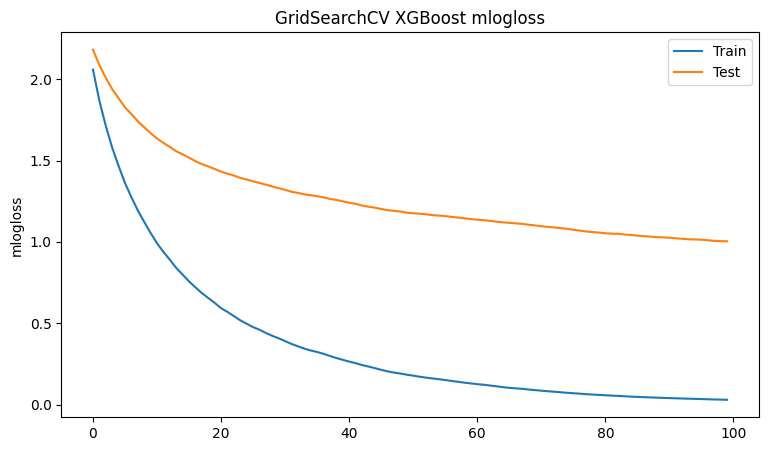

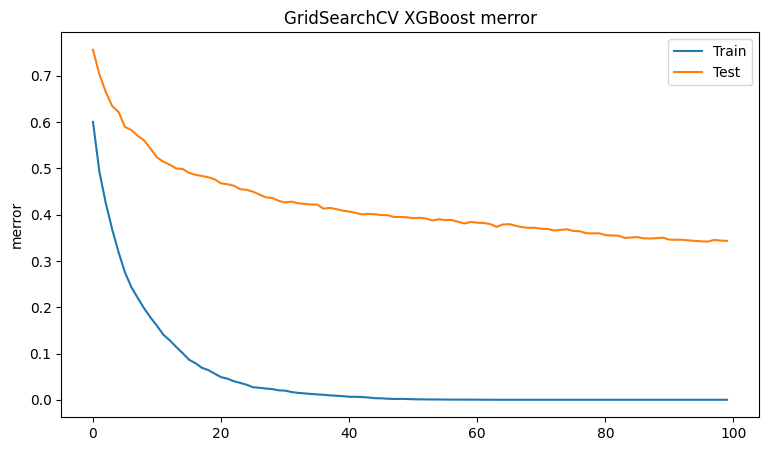

[[216  12   5  10   8   9  20  13   9  12]
 [ 14 169   9  10   9  11  18  17   9  19]
 [  5  10 203  14  21  10   8  14  11   6]
 [ 10   3  10 198   7  16   7  15   8  12]
 [ 14   7   7  11 181  16   9  14   8  10]
 [ 11   8   9   8  18 201  15  12   8  11]
 [ 12  18   9  12  15  12 165  11  11   7]
 [ 11  14  10  21   9  10  11 180   4   9]
 [  9  10  13   9   7  13   6  10 196  12]
 [  9  16  11   7   8  13  17  12  11 195]]
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       314
           1       0.63      0.59      0.61       285
           2       0.71      0.67      0.69       302
           3       0.66      0.69      0.68       286
           4       0.64      0.65      0.65       277
           5       0.65      0.67      0.66       301
           6       0.60      0.61      0.60       272
           7       0.60      0.65      0.62       279
           8       0.71      0.69      0.70       285
           9       0.67     

In [13]:
xgb_model = xgb.XGBClassifier(objective = 'multi:softmax', num_class = 100, eval_metric = ['merror','mlogloss'], max_depth= 5, learning_rate = 0.4, early_stopping_rounds = 10)
xgb_model.fit(X_train,y_train, verbose = 0, eval_set = [(X_train, y_train), (X_test, y_test)])
results = xgb_model.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('mlogloss')
plt.title('GridSearchCV XGBoost mlogloss')
plt.show()
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('merror')
plt.title('GridSearchCV XGBoost merror')
plt.show()
y_pred = xgb_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

lets retry with kfolding to check our results

In [14]:
data3 = data2.copy()
le = preprocessing.LabelEncoder()
data3['state'] = le.fit_transform(data1['state'])
kf = KFold(5, shuffle = True)
for train_index, test_index in kf.split(data3):
    xgb_model = xgb.XGBClassifier(objective = 'multi:softmax', num_class = 100, eval_metric = ['merror','mlogloss'], max_depth= 5, learning_rate = 0.6, early_stopping_rounds = 15)
    train = data3.iloc[train_index]
    test = data3.iloc[test_index]
    X_train = train.drop('state', axis = 1)
    X_test = test.drop('state', axis = 1)
    y_train = train['state']
    y_test = test['state']
    xgb_model.fit(X_train,y_train, verbose = 0, eval_set = [(X_train, y_train), (X_test, y_test)])
    y_pred = xgb_model.predict(X_test)
    print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.66      0.64       205
           1       0.62      0.64      0.63       215
           2       0.62      0.64      0.63       211
           3       0.66      0.72      0.69       249
           4       0.68      0.67      0.67       215
           5       0.75      0.73      0.74       255
           6       0.69      0.65      0.67       237
           7       0.72      0.65      0.68       242
           8       0.68      0.68      0.68       233
           9       0.69      0.70      0.69       258

    accuracy                           0.68      2320
   macro avg       0.67      0.67      0.67      2320
weighted avg       0.68      0.68      0.68      2320

              precision    recall  f1-score   support

           0       0.69      0.66      0.68       239
           1       0.60      0.64      0.62       220
           2       0.65      0.62      0.63       249
           3       0.73 